In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [3]:
# Define Ridge model
ridge = RidgeClassifier()

# Define hyperparameters
params = {
    'alpha': [0.1, 1, 10, 100]
}

# GridSearchCV for Ridge
grid_ridge = GridSearchCV(ridge, params, cv=5)
grid_ridge.fit(X_train, y_train)

# Best params and model
print("✅ Best Params:", grid_ridge.best_params_)
print("✅ Best Score:", grid_ridge.best_score_)


✅ Best Params: {'alpha': 0.1}
✅ Best Score: 0.9604395604395604


✅ Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        42
           1       0.95      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



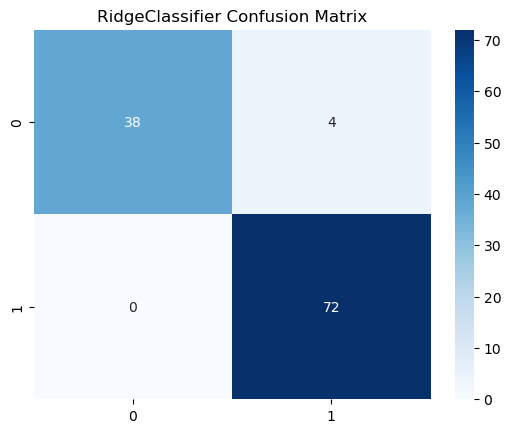

In [4]:
# Predict and evaluate
y_pred = grid_ridge.predict(X_test)

print("✅ Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("RidgeClassifier Confusion Matrix")
plt.show()


In [9]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# L1 needs scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Lasso (L1) Logistic Regression with CV
lasso_model = LogisticRegressionCV(
    Cs=10,
    penalty='l1',
    solver='liblinear',
    cv=5,
    max_iter=1000
)

lasso_model.fit(X_train, y_train)

print("✅ Lasso Model Score:", lasso_model.score(X_test, y_test))


✅ Lasso Model Score: 0.9824561403508771
